# **Actividad 4: Algoritmo Recocido Simulado**

## **Phabel Antonio López Delgado** [<phabel2001@gmail.com>]

### *Ejercicio 4:* Implementar un algoritmo de búsqueda local utilizando el recocido simulado para encontrar el mínimo de 3 funciones matemáticas.

In [ ]:
# Importar librarias requeridas
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definir la clase para un minimizador mediante recocido simulado
class minimizador:

    # Constructor
    def __init__(self, funcion_objetivo, dominio):
        self.funcion_objetivo = funcion_objetivo
        self.dominio = dominio

    # Funcion para mover los valores de un vector de variables un paso aleatorio
    def moverse(self, variables, tamano_paso):
        # Generalizar a un vector completo de variables
        nuevas_vars = variables[:]
        # Nuevos indices
        nuevos_indices = random.randint(0, len(variables) - 1)
        # Mover a una direccion aleatoria en todas las dimiensiones
        nuevas_vars[nuevos_indices] += random.uniform(-tamano_paso, tamano_paso)
        # Regresar las nuevas posiciones de las variables
        return nuevas_vars

    # Funcion para solucionar minimizador mediante algoritmo de recocido simulado
    def recocido_simulado(self, n_iteraciones, temperatura_inicial, tamano_paso, alpha):
        # Solucion inicial aleatoria en el espacio de busqueda acotado
        solucion_optima = [random.uniform(elemento[0], elemento[1]) for elemento in self.dominio]
        # Evaluar solucion inicial
        solucion_optima_evaluacion = self.funcion_objetivo(solucion_optima)
        # Marcar solucion inicial como posicion actual
        posicion, posicion_evaluacion = solucion_optima, solucion_optima_evaluacion
        # Iniciar historial
        historial_evaluaciones = [solucion_optima_evaluacion]
        # Establecer temperatura dinamica
        temperatura = temperatura_inicial

        # Busqueda
        for i in range(n_iteraciones):
            # Reducir temperatura
            temperatura *= alpha
            # Nueva solucion a explorar
            nueva_posicion = self.moverse(posicion, tamano_paso)
            # Evaluar nueva solucion
            nueva_posicion_evaluacion = self.funcion_objetivo(nueva_posicion)
            # Probabilidad de aceptar nueva solucion
            if nueva_posicion_evaluacion < solucion_optima_evaluacion or random.random() < math.exp((posicion_evaluacion - nueva_posicion_evaluacion) / temperatura):
                # Mover a nueva posicion
                posicion, posicion_evaluacion = nueva_posicion, nueva_posicion_evaluacion
                # Comparar si la nueva posicion es menor
                if posicion_evaluacion < solucion_optima_evaluacion:
                    # Actualizar solucion optima
                    solucion_optima, solucion_optima_evaluacion = posicion, posicion_evaluacion
                    # Agregar nueva solucion optima al historial
                    historial_evaluaciones.append((solucion_optima, solucion_optima_evaluacion))

        # Regresar solucion mas optima encontrada
        return solucion_optima, solucion_optima_evaluacion, historial_evaluaciones


Solucion optima de variables ordenadas: [1.3160753920739565].
Evaluacion f([1.3160753920739565]): 4.000000000158128


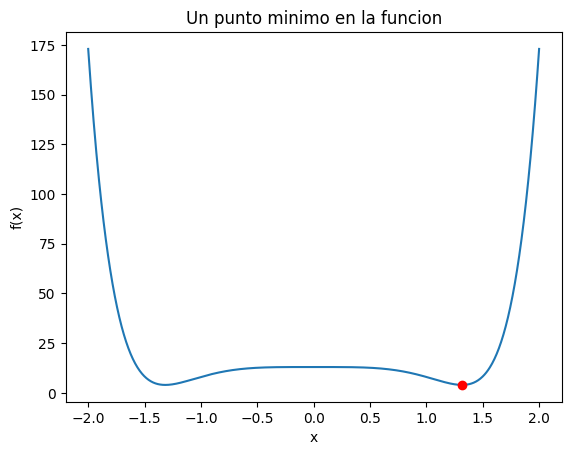

In [ ]:
# Funcion 1 -> f(x)=(x^4−3)^2+4
def funcion_1(variables):
    x = variables[0]
    return ((x**4 - 3)**2) + 4

# Dominio acotado de la funcion como espacio de busqueda
dominio = [(-5.0, 5.0) for _ in range(1)]

# Parametros para el Recocido Simulado
n_iteraciones = 10000
tamano_paso = 0.01
temperatura_inicial = 10
alpha = 0.9

# Evaluar minimizador
minimizador_1 = minimizador(funcion_objetivo=funcion_1, dominio=dominio)
solucion_optima, solucion_optima_evaluacion, historial_evaluaciones = minimizador_1.recocido_simulado(n_iteraciones=n_iteraciones,
                                                                                                      temperatura_inicial=temperatura_inicial,
                                                                                                      tamano_paso=tamano_paso,
                                                                                                      alpha=alpha)

# Mostrar resultados
print(f"Solucion optima de variables ordenadas: {solucion_optima}.\nEvaluacion f({solucion_optima}): {solucion_optima_evaluacion}")

# Plottear solucion
def funcion_1_plot(x):
    return ((x**4 - 3)**2) + 4

x = np.linspace(-2, 2, 1000)
y = funcion_1_plot(x)
plt.plot(x, y)
plt.plot(solucion_optima[0], solucion_optima_evaluacion, marker="o", color="red")
plt.title("Un punto minimo en la funcion")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Solucion optima de variables ordenadas: [2.99999896728545].
Evaluacion f([2.99999896728545]): 4.000000000001067


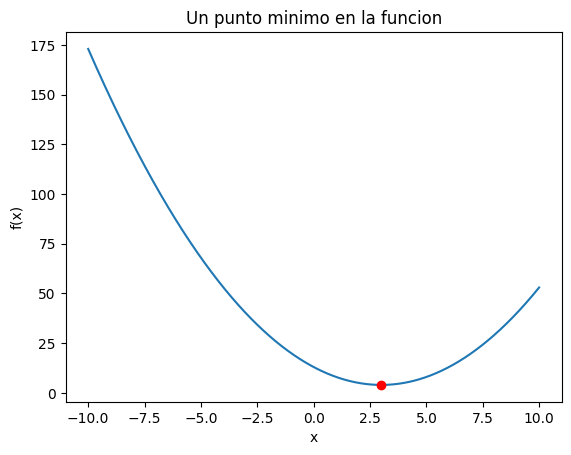

In [ ]:
# Funcion 2 -> f(x) = (x-3)^2 + 4
def funcion_2(variables):
    x = variables[0]
    return ((x-3)**2) + 4

# Dominio acotado de la funcion como espacio de busqueda
dominio = [(-10.0, 10.0) for _ in range(1)]

# Parametros para el Recocido Simulado
n_iteraciones = 10000
tamano_paso = 0.01
temperatura_inicial = 10
alpha = 0.9

# Evaluar minimizador
minimizador_2 = minimizador(funcion_objetivo=funcion_2, dominio=dominio)
solucion_optima, solucion_optima_evaluacion, historial_evaluaciones = minimizador_2.recocido_simulado(n_iteraciones=n_iteraciones,
                                                                                                      temperatura_inicial=temperatura_inicial,
                                                                                                      tamano_paso=tamano_paso,
                                                                                                      alpha=alpha)

# Mostrar resultados
print(f"Solucion optima de variables ordenadas: {solucion_optima}.\nEvaluacion f({solucion_optima}): {solucion_optima_evaluacion}")

# Plottear solucion
def funcion_2_plot(x):
    return ((x-3)**2) + 4

x = np.linspace(-10, 10, 1000)
y = funcion_2_plot(x)
plt.plot(x, y)
plt.plot(solucion_optima[0], solucion_optima_evaluacion, marker="o", color="red")
plt.title("Un punto minimo en la funcion")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [ ]:
# Funcion 3 [Puntos extra] -> f(x1, x2, x3, x4) = [10(x2 -x1^2)]^2 + (1 - x1)^2 + 90(x4 - x3^2) + (1-x3)^2 + 10(x2 + x4 -2)^2 + 0.1(x2 - x4)^2

def funcion_3(variables):
    x_1 = variables[0]
    x_2 = variables[1]
    x_3 = variables[2]
    x_4 = variables[3]
    return (10*(x_2 - x_1**2))**2 + (1 - x_1)**2 + 90*(x_4 - x_3**2)**2 + (1 - x_3)**2 + 10*(x_2 + x_4 - 2)**2 + 0.1*(x_2 - x_4)**2

# Dominio acotado de la funcion como espacio de busqueda
dominio = [(-5.0, 5.0) for _ in range(4)]

# Parametros para el Recocido Simulado
n_iteraciones = 1000000
tamano_paso = 0.001
temperatura_inicial = 10
alpha = 0.9

# Evaluar minimizador
minimizador_3 = minimizador(funcion_objetivo=funcion_3, dominio=dominio)
solucion_optima, solucion_optima_evaluacion, historial_evaluaciones = minimizador_3.recocido_simulado(n_iteraciones=n_iteraciones,
                                                                                                      temperatura_inicial=temperatura_inicial,
                                                                                                      tamano_paso=tamano_paso,
                                                                                                      alpha=alpha)

# Mostrar resultados
print(f"Solucion optima de variables ordenadas: {solucion_optima}.\nEvaluacion f({solucion_optima}): {solucion_optima_evaluacion}")
print("No se puede plotear en 4 dimensiones satisfactoriamente.")

Solucion optima de variables ordenadas: [0.9997121667336786, 0.9994264107191151, 1.0002826610236508, 1.0005654860376443].
Evaluacion f([0.9997121667336786, 0.9994264107191151, 1.0002826610236508, 1.0005654860376443]): 2.935495282185277e-07
No se puede plotear en 4 dimensiones satisfactoriamente.


In [ ]:
def funcion_4(variables):
    x_1 = variables[0]
    x_2 = variables[1]
    return (20 + x_1**2 + x_2**2 - np.cos(2*np.pi*x_1) + np.cos(2*np.pi*x_2))

# Dominio acotado de la funcion como espacio de busqueda
dominio = [(-5.12, 5.12) for _ in range(2)]

# Parametros para el Recocido Simulado
n_iteraciones = 1000
tamano_paso = 0.01
temperatura_inicial = 10
alpha = 0.9

# Evaluar minimizador
minimizador_4 = minimizador(funcion_objetivo=funcion_4, dominio=dominio)
solucion_optima, solucion_optima_evaluacion, historial_evaluaciones = minimizador_4.recocido_simulado(n_iteraciones=n_iteraciones,
                                                                                                      temperatura_inicial=temperatura_inicial,
                                                                                                      tamano_paso=tamano_paso,
                                                                                                      alpha=alpha)

# Mostrar resultados
print(f"Solucion optima de variables ordenadas: {solucion_optima}.\nEvaluacion f({solucion_optima}): {solucion_optima_evaluacion}")

Solucion optima de variables ordenadas: [-0.9509884335444134, 0.47579217169093646].
Evaluacion f([-0.9509884335444134, 0.47579217169093646]): 19.189345141482907


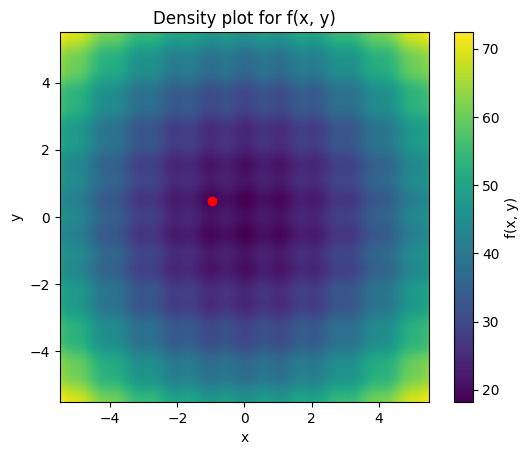

In [ ]:
# Plot
import matplotlib.pyplot as plt

def f(x, y):
    return (20 + x**2 + y**2 - np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

# Grid
x = np.linspace(-5.12, 5.12, 300)
y = np.linspace(-5.12, 5.12, 300)
X, Y = np.meshgrid(x, y)

# Evaluate
Z = f(X, Y)

# Density Plot
plt.imshow(Z, extent=[-5.5, 5.5, -5.5, 5.5], origin='lower')
plt.colorbar(label='f(x, y)')
plt.plot(solucion_optima[0], solucion_optima[1], marker="o", color="red")
plt.title('Density plot for f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

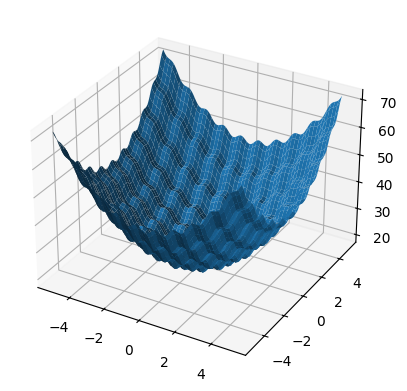

In [ ]:
# Plot
import matplotlib.pyplot as plt

def f(x, y):
    return (20 + x**2 + y**2 - np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

# Grid
x = np.linspace(-5.12, 5.12, 300)
y = np.linspace(-5.12, 5.12, 300)
X, Y = np.meshgrid(x, y)

# Evaluate
Z = f(X, Y)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.scatter(solucion_optima[0], solucion_optima[1], solucion_optima_evaluacion, color='red', marker='o')
plt.show()